<a href="https://colab.research.google.com/github/Jude-Morgan/Machine-Learning-projects/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bank_Customer_Churn_Prediction.csv')

In [ ]:
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5075,15684921,792,Spain,Male,25,8,142862.21,1,1,1,130639.01,0
7147,15712877,724,Spain,Male,36,1,0.00,2,1,0,52462.25,0
8237,15737275,649,France,Male,39,3,113096.41,1,1,1,60335.24,0
4072,15741865,810,France,Female,38,9,153166.17,1,1,1,93261.69,0
6196,15576304,698,France,Male,29,5,95167.55,1,1,1,152723.23,0


In [ ]:
df.shape #total rows and columns

(10000, 12)

In [ ]:
df.drop("customer_id", axis = 1, inplace = True	) # Cusomter ID is not useful

In [ ]:
df.dtypes #Gets datatypes from dataset

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of       credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      c

In [ ]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
df.duplicated().sum() # Making sure nothing is duplicated

0

In [ ]:
df.isnull().sum() # return the number of missing values in the dataset.

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df["country"].unique() #finds the unique elements of an array and returns these unique elements as a sorted array. In this case it's the countries from the dataset

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder #Lable encdoding, converts strings to integers
L=LabelEncoder()
df["gender"]=L.fit_transform(df["gender"])
df["country"]=L.fit_transform(df["country"])
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Data Visualisation:

<Axes: xlabel='age', ylabel='count'>

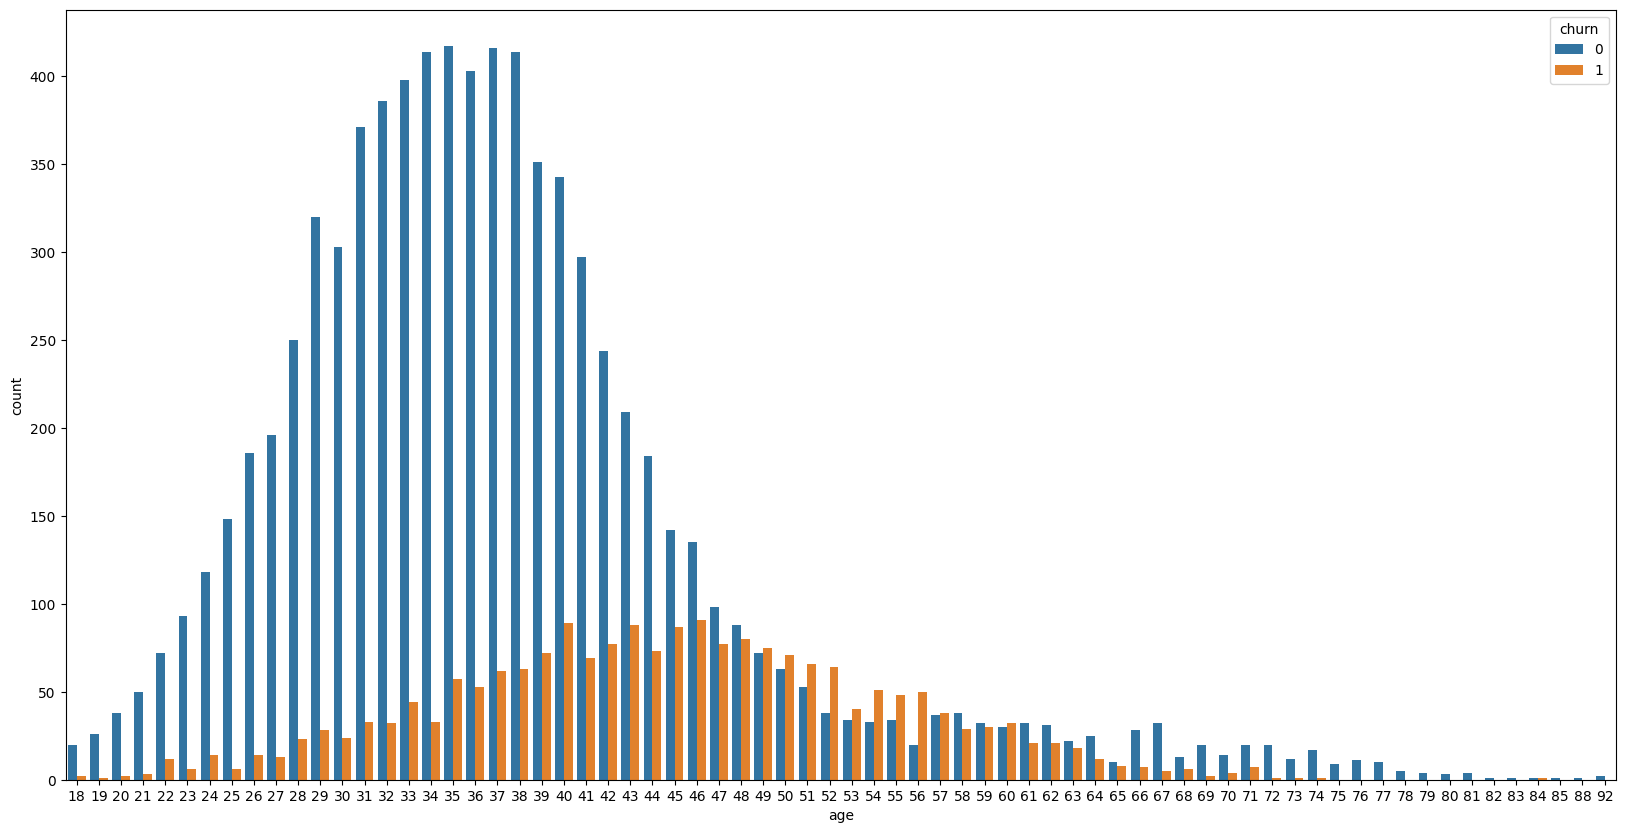

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'age', hue = 'churn', data = df)

<Axes: xlabel='churn', ylabel='age'>

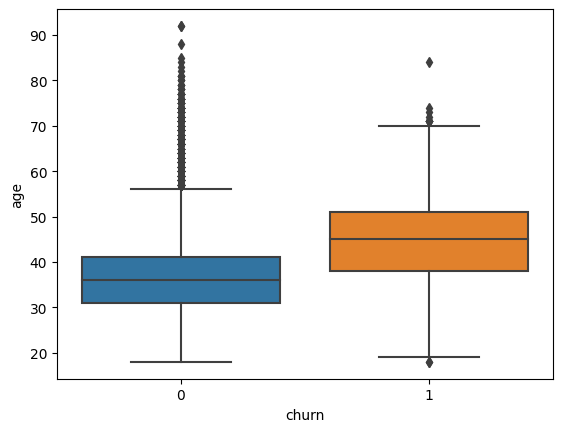

In [ ]:
sns.boxplot(x="churn", y="age", data=df)

<Axes: xlabel='credit_score', ylabel='balance'>

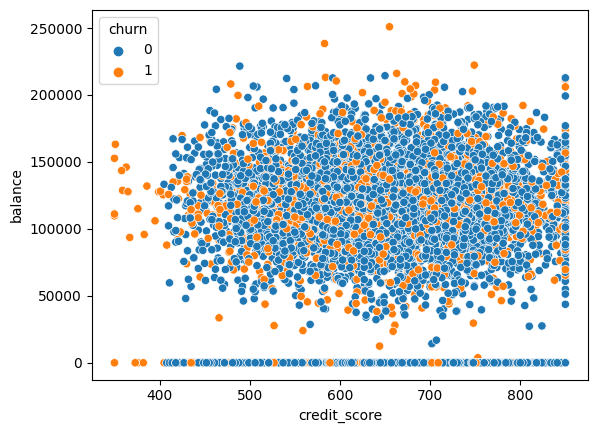

In [ ]:
sns.scatterplot(x="credit_score", y="balance", data=df, hue = "churn")

<Axes: xlabel='estimated_salary', ylabel='Density'>

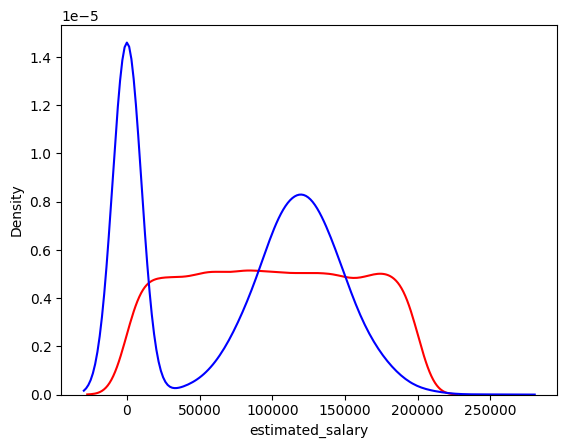

In [ ]:
sns.kdeplot(df["estimated_salary"],color='red')
sns.kdeplot(df["balance"],color='blue')

In [ ]:
x=df.iloc[:,:-1] #Set independent and dependent variable
y=df.iloc[:,-1]

In [ ]:
from collections import Counter #check count of categories in dependent variable
print(Counter(y))

Counter({0: 7963, 1: 2037})


In [ ]:
from imblearn.over_sampling import SMOTE
S=SMOTE()
X_df,y_df=S.fit_resample(x,y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
d=mms.fit_transform(X_df)
d

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.436     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.11339867],
       [0.528     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.63611819],
       [0.576     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.71374725]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y_df,test_size=0.2,random_state=42)

In [ ]:
model = keras.Sequential()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
399/399 [==============================] - 2s 1ms/step - loss: 0.5406 - accuracy: 0.7342
Epoch 2/150
399/399 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.7741
Epoch 3/150
399/399 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7819
Epoch 4/150
399/399 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7856
Epoch 5/150
399/399 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7913
Epoch 6/150
399/399 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.7971
Epoch 7/150
399/399 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8021
Epoch 8/150
399/399 [==============================] - 1s 2ms/step - loss: 0.4193 - accuracy: 0.8077
Epoch 9/150
399/399 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8116
Epoch 10/150
399/399 [==============================] - 1s 3ms/step - loss: 0.4098 - accura

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(y_pred)

100/100 [==============================] - 0s 768us/step
[[False]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [ ]:
Pred=[]
for s in y_pred:
    if s==False:
        a=0
        Pred.append(a)
    else:
        b=1
        Pred.append(b)
print(Pred)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [ ]:
Predict=pd.DataFrame({"Actual":y_test,"Predicted":Pred})
Predict

,Actual,Predicted
6126,0,0
7093,1,1
1659,0,0
15727,1,1
9682,0,0
...,...,...
11031,1,1
9747,1,1
5912,0,1
2879,1,1


array([[1346,  287],
       [ 235, 1318]])

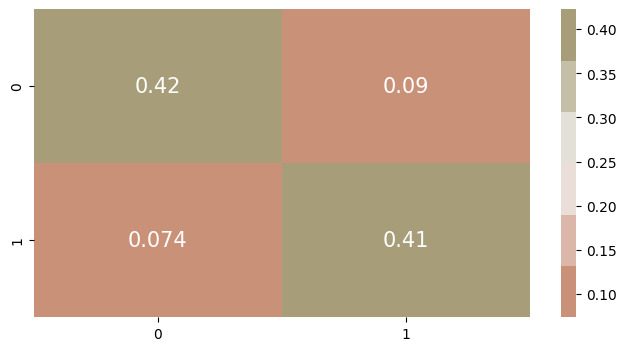

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
cmap1 = sns.diverging_palette(751,75,  s=40, l=65, n=6)
plt.subplots(figsize=(8,4))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
cf_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1633
           1       0.82      0.85      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

